In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.000,NaN,C
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.100,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.500,NaN,Q
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.475,E121,S


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


See with visualization

Percentage of male that survived: 18.890814558058924
Percentage of female that survived: 74.20382165605095


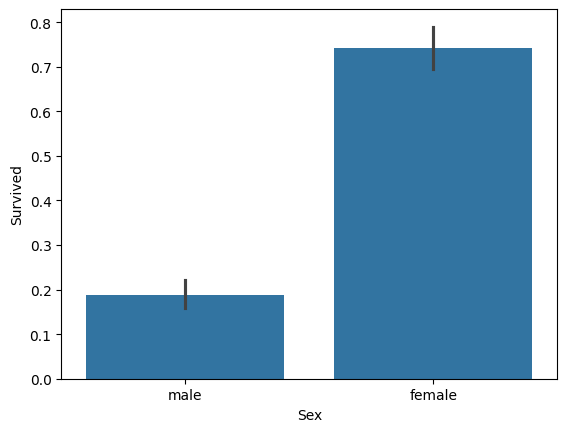

In [ ]:
# Survival based on sex

sns.barplot(x='Sex', y='Survived', data=train)

print('Percentage of male that survived:', train['Survived'][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
print('Percentage of female that survived:', train['Survived'][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

Female passenger tend to survive in titanic.

Percentage Pclass 1 that survived: 62.96296296296296
Percentage Pclass 2 that survived: 47.28260869565217
Percentage Pclass 3 that survived: 24.236252545824847


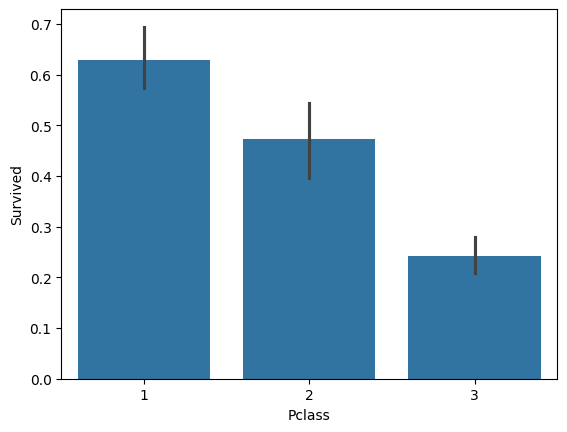

In [ ]:
# Percentage survivor by Passenger Class

sns.barplot(x='Pclass', y='Survived', data=train)

print('Percentage Pclass 1 that survived:', train['Survived'][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print('Percentage Pclass 2 that survived:', train['Survived'][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print('Percentage Pclass 3 that survived:', train['Survived'][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

People who have higher class or economy tend to survive.

Percentage SibSp: 0 that survived: 34.53947368421053
Percentage SibSp: 1 that survived: 53.588516746411486
Percentage SibSp: 2 that survived: 46.42857142857143
Percentage SibSp: 3 that survived: 25.0
Percentage SibSp: 4 that survived: 16.666666666666664


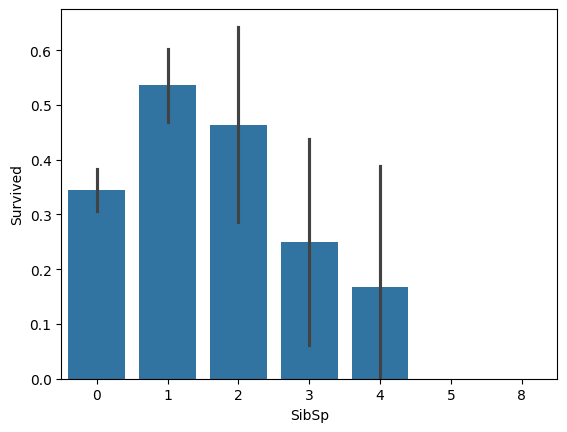

In [ ]:
# Number of people who survived based on SibSp (Sibling or Spouse)

sns.barplot(x='SibSp', y='Survived', data=train)

print('Percentage SibSp: 0 that survived:', train['Survived'][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print('Percentage SibSp: 1 that survived:', train['Survived'][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print('Percentage SibSp: 2 that survived:', train['Survived'][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print('Percentage SibSp: 3 that survived:', train['Survived'][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print('Percentage SibSp: 4 that survived:', train['Survived'][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

People who have many companion, tends to cease to exist in Titanic crash.

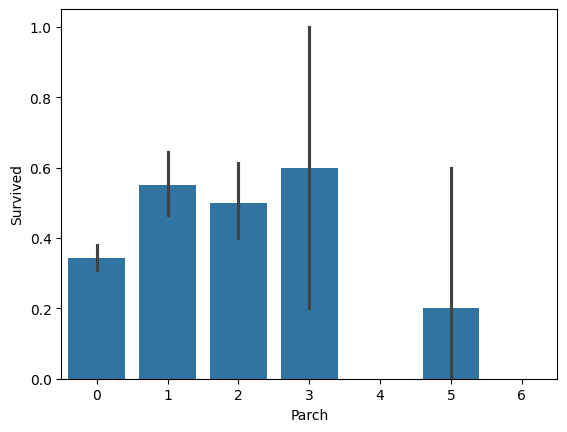

In [ ]:
# Visualization of peoples survived based on Parch (Parent or Child)

sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

People who have Parent or Child less than 4 have more survival percentage.

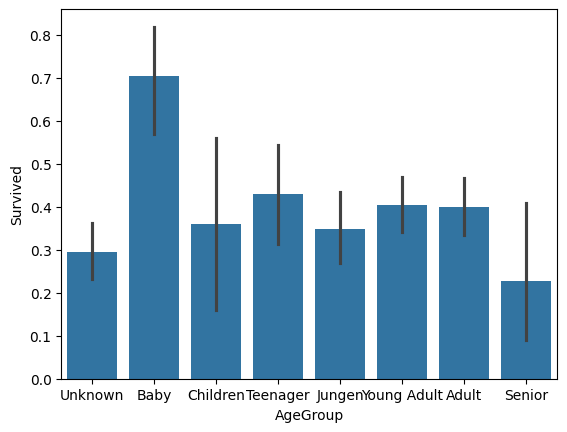

In [ ]:
# Categorizing age group
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Children', 'Teenager', 'Jungen', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

# Viz it
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

Baby have higher survivalability.

Percentage isCabib: 0 that survived: 29.985443959243085
Percentage isCabib: 1 that survived: 66.66666666666666


<Axes: xlabel='isCabin', ylabel='Survived'>

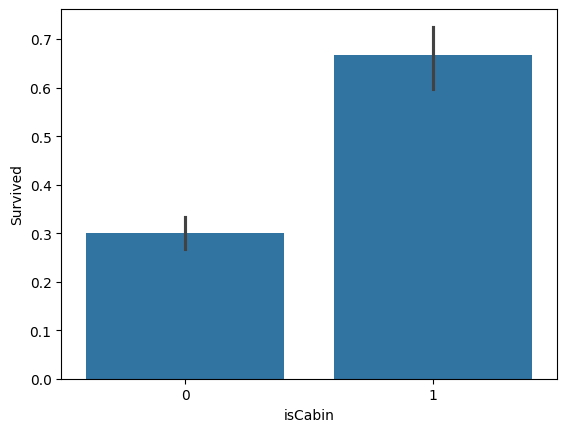

In [ ]:
# There is so many NaN in Cabin column. What is the survivalability rate of recorded and not recorded Cabin?

train['isCabin'] = (train['Cabin'].notnull().astype('int'))
test['isCabin'] = (test['Cabin'].notnull().astype('int'))

print('Percentage isCabib: 0 that survived:', train['Survived'][train["isCabin"] == 0].value_counts(normalize = True)[1]*100)
print('Percentage isCabib: 1 that survived:', train['Survived'][train["isCabin"] == 1].value_counts(normalize = True)[1]*100)

sns.barplot(x='isCabin', y='Survived', data=train)

People who registered in Cabin are likely survived.

**Cleaning the Data**

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Delete irrelevant columns

#train = train.drop(['Cabin', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'Ticket'], axis=1)

In [ ]:
# See the embarked

sth = train[train['Embarked'] == 'S'].shape[0]
print('Peoples embarking from Southamton (S):', sth)

chr = train[train['Embarked'] == 'C'].shape[0]
print('Peoples embarking from Cherbourg (C):', chr)

que = train[train['Embarked'] == 'Q'].shape[0]
print('Peoples embarking from Queenstown (Q):', que)

Peoples embarking from Southamton (S): 644
Peoples embarking from Cherbourg (C): 168
Peoples embarking from Queenstown (Q): 77


In [ ]:
# Filling NaN in Embarked with S because of many peoples come from Southampton
train = train.fillna({'Embarked': 'S'})

Create Age Feature

In [ ]:
combined = [train, test]

# Extract title from each Name
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
# Replace various Titles with common Name
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


Woah, what we got there...

In [ ]:
# Map each title with num value
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,isCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Jungen,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,1


In [ ]:
# Filling NaN Age with mode age group for each title
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() #Young Adult
miss_age = train[train['Title'] == 2]['AgeGroup'].mode() #Jungen
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode() #Adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode() #Baby?
royal_age = train[train['Title'] == 5]['AgeGroup'].mode() #Adult
rare_age = train[train['Title'] == 6]['AgeGroup'].mode() #Adult

age_title_mapping = {1: 'Young Adult', 2: 'Jungen', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

for x in range (len(train['AgeGroup'])):
    if train['AgeGroup'][x] == 'Unknown':
        train['AgeGroup'][x] = age_title_mapping[train['Title'][x]]

for x in range (len(test['AgeGroup'])):
    if test['AgeGroup'][x] == 'Unknown':
        test['AgeGroup'][x] = age_title_mapping[test['Title'][x]]

In [ ]:
# Mapping each Age val to num val
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Jungen': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,isCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,5.0,0,1


In [ ]:
# Dropping Name column
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [ ]:
# Mapping Sex column
sex_mapping = {'male': 0, 'female': 1}

train['Sex']= train['Sex'].map(sex_mapping)
test['Sex']= test['Sex'].map(sex_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,isCabin,Title
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,4.0,0,1
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,6.0,1,3
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,0,2
3,4,1,1,1,1,0,113803,53.1000,C123,S,5.0,1,3
4,5,0,3,0,0,0,373450,8.0500,NaN,S,5.0,0,1


In [ ]:
# Mapping Embarked column
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,isCabin,Title
795,796,0,2,0,0,0,28213,13.0000,NaN,1,6.0,0,1
401,402,0,3,0,0,0,341826,8.0500,NaN,1,5.0,0,1
823,824,1,3,1,0,1,392096,12.4750,E121,1,5.0,1,3
202,203,0,3,0,0,0,3101264,6.4958,NaN,1,5.0,0,1
687,688,0,3,0,0,0,349228,10.1708,NaN,1,4.0,0,1


Fare column featuring

In [ ]:
# Filling NaN in Fare column
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass = test['Pclass'][x] #Pclass=3
        test['Fare'][x] = round(train[train['Pclass'] == pclass]['Fare'].mean(), 4)

# Map Fare val into num val
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

# Dropping Fare values
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

In [ ]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,AgeGroup,isCabin,Title,FareBand
712,713,1,1,0,1,0,19996,C126,1,6.0,1,1,4
331,332,0,1,0,0,0,113043,C124,1,6.0,1,1,3
196,197,0,3,0,0,0,368703,NaN,3,5.0,0,1,1
401,402,0,3,0,0,0,341826,NaN,1,5.0,0,1,2
226,227,1,2,0,0,0,SW/PP 751,NaN,1,4.0,0,1,2
279,280,1,3,1,1,1,C.A. 2673,NaN,1,5.0,0,3,3
507,508,1,1,0,0,0,111427,NaN,1,5.0,0,1,3
823,824,1,3,1,0,1,392096,E121,1,5.0,1,3,2
639,640,0,3,0,1,0,376564,NaN,1,5.0,0,1,3
268,269,1,1,1,0,1,PC 17582,C125,1,6.0,1,3,4


In [ ]:
test.head(
)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,isCabin,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


Train the data with various models

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state=0)

The test data is 22% of train data, this to test the accuracy

Now, test the models

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Imputing NaN values
imputer = SimpleImputer(strategy='mean')

# Drop non-numeric columns before imputation
x_train_numeric = x_train.drop(['Ticket', 'Cabin'], axis=1)
x_val_numeric = x_val.drop(['Ticket', 'Cabin'], axis=1)

x_train_imputed = imputer.fit_transform(x_train_numeric)
x_val_imputed = imputer.fit_transform(x_val_numeric)

gnb = GaussianNB()
gnb.fit(x_train_imputed, y_train)
y_pred = gnb.predict(x_val_imputed)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.17


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logrec = LogisticRegression()
logrec.fit(x_train_imputed, y_train)
y_pred = logrec.predict(x_val_imputed)
acc_logrec = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logrec)

78.68


In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_imputed, y_train)
y_pred = svc.predict(x_val_imputed)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.73


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x_train_imputed, y_train)
y_pred = lsvc.predict(x_val_imputed)
acc_lsvc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_lsvc)

77.66


In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(x_train_imputed, y_train)
y_pred = perc.predict(x_val_imputed)
acc_perc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perc)

78.17


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_imputed, y_train)
y_pred = dt.predict(x_val_imputed)
acc_dt = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_dt)

78.17


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_imputed, y_train)
y_pred = rf.predict(x_val_imputed)
acc_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_rf)

83.76


In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_imputed, y_train)
y_pred = knn.predict(x_val_imputed)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.23


In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_imputed, y_train)
y_pred = sgd.predict(x_val_imputed)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

77.66


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gdc = GradientBoostingClassifier()
gdc.fit(x_train_imputed, y_train)
y_pred = gdc.predict(x_val_imputed)
acc_gdc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gdc)

84.26


Comparing each models

In [ ]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'linear SVC', 'Perceptron', 'Decision Tree', 'Random Forest', 'KNN', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_gaussian, acc_logrec, acc_svc, acc_lsvc, acc_perc, acc_dt, acc_rf, acc_knn, acc_sgd, acc_gdc]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.26
6,Random Forest,83.76
7,KNN,82.23
2,Support Vector Machine,81.73
1,Logistic Regression,78.68
0,Gaussian Naive Bayes,78.17
4,Perceptron,78.17
5,Decision Tree,78.17
3,linear SVC,77.66
8,Stochastic Gradient Descent,77.66


In [ ]:
# Submission file
X_test_imputed = imputer.fit_transform(test.drop('PassengerId', axis=1))
ids = test['PassengerId']
pred = gdc.predict(X_test_imputed)

output = pd.DataFrame({ 'PassengerId': ids, 'Survived': pred })
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
output.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "Using Random Forest"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
